In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
df=pd.read_csv(r"C:\Users\PAVAN TEJA\Downloads\projects\ecommerce-churn-prediction\data\processed\customer_features.csv")
print("Shape",df.shape)

df.head()

Shape (3227, 41)


,CustomerID,churn,Recency,Frequency,Monetary,TotalQuantity,AvgOrderValue,TotalInvoices,CustomerLifetimeDays,AvgDaysBetweenPurchases,PurchaseRatePerMonth,WeekendPurchaseRatio,EveningPurchaseRatio,UniqueActiveMonths,UniqueActiveDays,MonthlyPurchaseVariance,UniqueProducts,ProductDiversityRatio,AvgItemsPerInvoice,RepeatPurchaseRatio,TopProductConcentration,RecencyScore,MonetaryScore,RevenuePerMonth,QuantityPerMonth,InvoiceFrequencyScore,EngagementScore,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Recency_Frequency,Monetary_Frequency,Recency_Monetary,Log_Monetary,Log_Frequency,Log_Recency,High_Recency_Flag,Low_Frequency_Flag,Low_Monetary_Flag,Recency_Bucket
0,12346,1,73,11,372.86,70,33.896364,11,196,19.6,1.460177,0.000000,0.0,4,4,2.061553,26,2.363636,6.363636,0.038462,0.242424,0.258865,0.006749,93.215,17.5,2.750000,0.055018,1,2,1,4,803,4101.46,27218.78,5.923881,2.484907,4.304065,0,0,1,2
1,12349,0,133,1,794.52,457,794.520000,1,0,0.0,1.000000,0.000000,0.0,1,1,0.000000,40,40.000000,457.000000,0.000000,0.025000,0.471631,0.014400,794.520,457.0,1.000000,0.007609,2,0,2,4,133,794.52,105671.16,6.678996,0.693147,4.897840,1,1,0,3
2,12355,1,111,1,437.11,253,437.110000,1,0,0.0,1.000000,0.000000,0.0,1,1,0.000000,20,20.000000,253.000000,0.000000,0.050000,0.393617,0.007915,437.110,253.0,1.000000,0.004799,2,0,2,4,111,437.11,48519.21,6.082470,0.693147,4.718499,1,1,0,3
3,12358,0,94,2,382.13,156,191.065000,2,181,181.0,0.284360,0.000000,0.0,2,2,0.000000,21,10.500000,78.000000,0.047619,0.090909,0.333333,0.006917,191.065,78.0,1.000000,0.009222,2,0,1,3,188,764.26,35920.22,5.948374,1.098612,4.553877,1,0,1,3
4,12359,0,79,5,1236.48,426,247.296000,5,198,49.5,0.657895,0.362319,0.0,3,4,0.577350,67,13.400000,85.200000,0.029851,0.028986,0.280142,0.022420,412.160,142.0,1.666667,0.080695,2,2,3,7,395,6182.40,97681.92,7.120832,1.791759,4.382027,1,0,0,2


In [2]:
df["churn"].value_counts(normalize=True)

churn
0    0.576697
1    0.423303
Name: proportion, dtype: float64

In [3]:
churn_summary=df.groupby("churn").mean()
churn_summary

,CustomerID,Recency,Frequency,Monetary,TotalQuantity,AvgOrderValue,TotalInvoices,CustomerLifetimeDays,AvgDaysBetweenPurchases,PurchaseRatePerMonth,WeekendPurchaseRatio,EveningPurchaseRatio,UniqueActiveMonths,UniqueActiveDays,MonthlyPurchaseVariance,UniqueProducts,ProductDiversityRatio,AvgItemsPerInvoice,RepeatPurchaseRatio,TopProductConcentration,RecencyScore,MonetaryScore,RevenuePerMonth,QuantityPerMonth,InvoiceFrequencyScore,EngagementScore,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Recency_Frequency,Monetary_Frequency,Recency_Monetary,Log_Monetary,Log_Frequency,Log_Recency,High_Recency_Flag,Low_Frequency_Flag,Low_Monetary_Flag,Recency_Bucket
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,15340.108006,76.025255,4.504030,1206.150240,655.343901,264.191681,4.504030,117.022031,41.061615,0.939772,0.161005,0.049326,3.147770,2.403546,0.244465,62.048898,17.631107,150.322870,0.162386,0.078161,0.269593,0.021869,327.357721,183.540556,1.252032,0.303210,1.242880,0.846857,1.823751,3.913487,188.229447,17800.816278,47954.133979,6.419906,1.427067,3.781574,0.394412,0.265449,0.364858,1.562601
1,15362.875549,117.121523,1.993411,452.869505,251.094436,225.482130,1.993411,49.374817,28.808919,0.940030,0.144544,0.056042,1.674231,1.540996,0.095925,29.704246,16.436762,125.639896,0.069253,0.130490,0.415325,0.008200,253.482129,141.173239,1.139668,0.027163,1.825769,0.283309,1.058565,3.167643,188.462665,1968.798868,41109.575604,5.568458,0.986643,4.362528,0.637628,0.565886,0.683748,2.330161


In [4]:
features_only = df.drop(columns=["CustomerID", "churn"])

churn_summary = df.groupby("churn")[features_only.columns].mean()
diff=(churn_summary.loc[0]-churn_summary.loc[1]).abs()

diff=diff.sort_values(ascending=False)

diff.head(10)

Monetary_Frequency      15832.017410
Recency_Monetary         6844.558375
Monetary                  753.280735
TotalQuantity             404.249465
RevenuePerMonth            73.875592
CustomerLifetimeDays       67.647214
QuantityPerMonth           42.367317
Recency                    41.096267
AvgOrderValue              38.709551
UniqueProducts             32.344652
dtype: float64

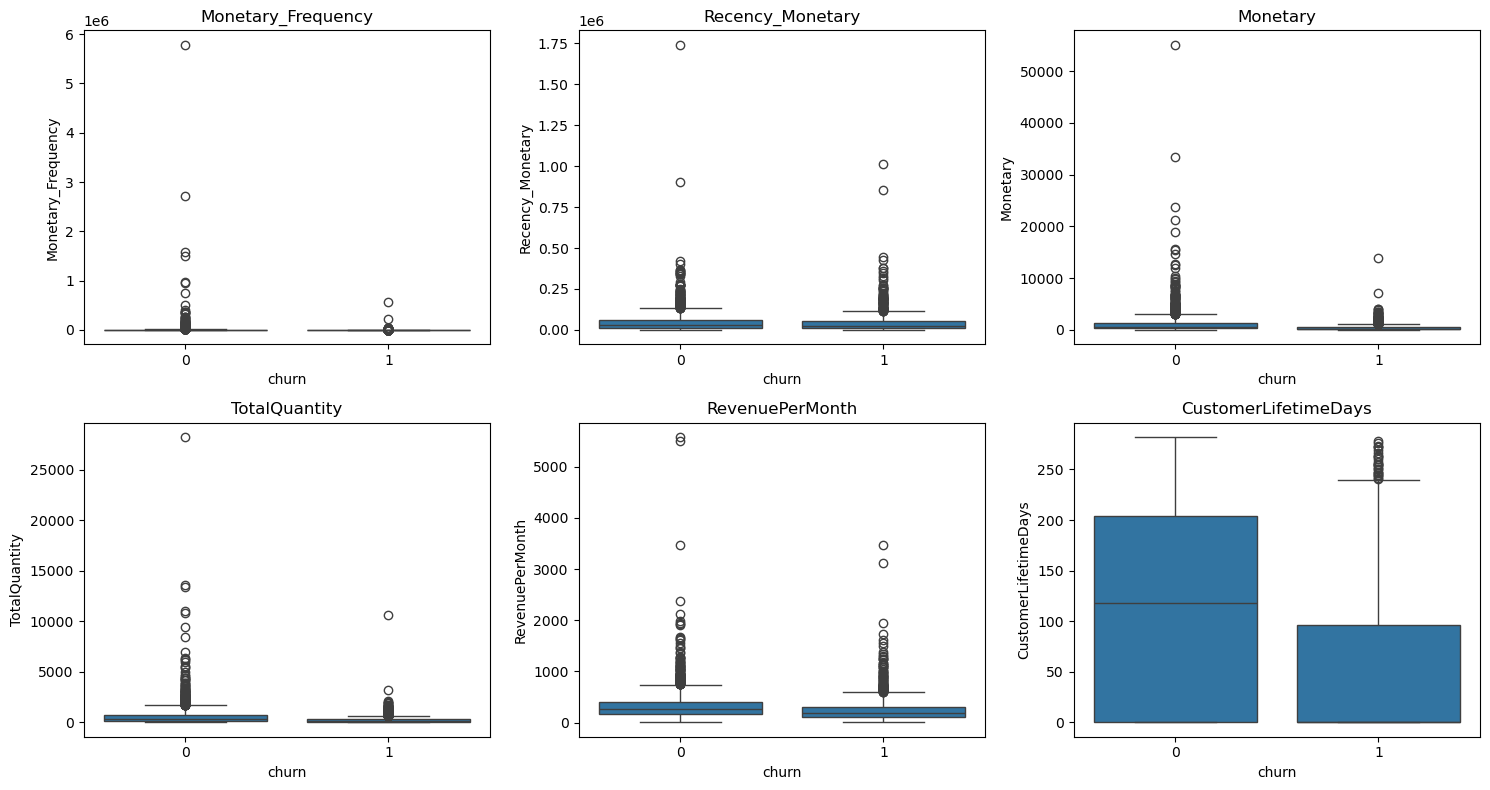

In [5]:
top_features = diff.head(6).index.tolist()

plt.figure(figsize=(15,8))
for i, col in enumerate(top_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(x="churn", y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()


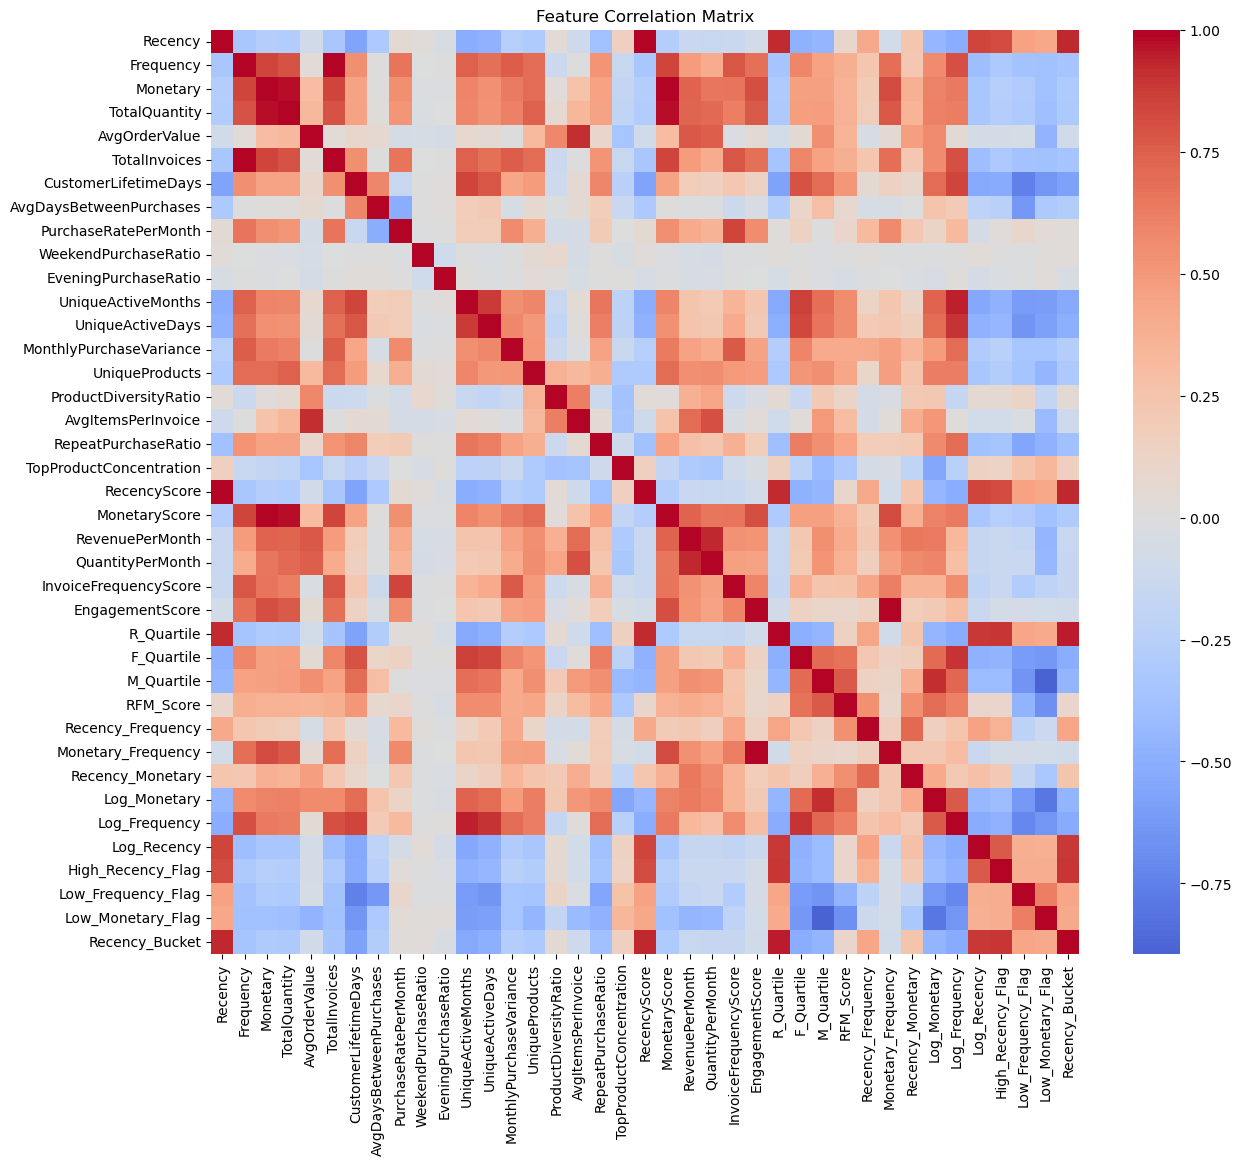

In [6]:
corr = features_only.corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


In [7]:
high_corr = []

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

print("Highly Correlated Feature Pairs (>0.9):")
high_corr


Highly Correlated Feature Pairs (>0.9):


[('TotalQuantity', 'Monetary', np.float64(0.9721003778355476)),
 ('TotalInvoices', 'Frequency', np.float64(1.0)),
 ('AvgItemsPerInvoice', 'AvgOrderValue', np.float64(0.9125172718555546)),
 ('RecencyScore', 'Recency', np.float64(0.9999999999999991)),
 ('MonetaryScore', 'Monetary', np.float64(0.9999999999999974)),
 ('MonetaryScore', 'TotalQuantity', np.float64(0.9721003778355501)),
 ('QuantityPerMonth', 'RevenuePerMonth', np.float64(0.9315239733007168)),
 ('R_Quartile', 'Recency', np.float64(0.9251419148664004)),
 ('R_Quartile', 'RecencyScore', np.float64(0.9251419148663984)),
 ('Monetary_Frequency', 'EngagementScore', np.float64(0.9976392996741771)),
 ('Log_Monetary', 'M_Quartile', np.float64(0.9165852354200666)),
 ('Log_Frequency', 'UniqueActiveMonths', np.float64(0.9446325365963876)),
 ('Log_Frequency', 'F_Quartile', np.float64(0.901199030624069)),
 ('Recency_Bucket', 'Recency', np.float64(0.9314988097563676)),
 ('Recency_Bucket', 'RecencyScore', np.float64(0.9314988097563692)),
 ('Re

In [8]:
features_to_drop = [
    "TotalQuantity",           # correlated with QuantityPerMonth
    "TotalInvoices",           # correlated with Frequency
    "RevenuePerMonth",         # correlated with Monetary
]

df_model = df.drop(columns=["CustomerID"] + features_to_drop)

print("Modeling dataset shape:", df_model.shape)


Modeling dataset shape: (3227, 37)


In [9]:
df_model.to_csv(r"C:\Users\PAVAN TEJA\Downloads\projects\ecommerce-churn-prediction\data\processed\model_ready_dataset.csv", index=False)

# Understanding all features through visualizations

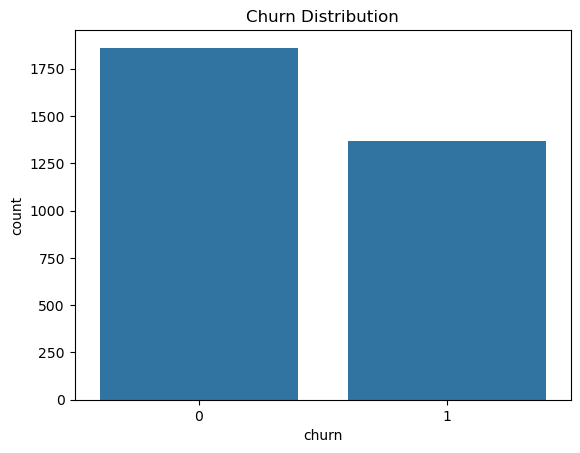

In [10]:
#CHURN DISTRIBUTION BAR PLOT
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()


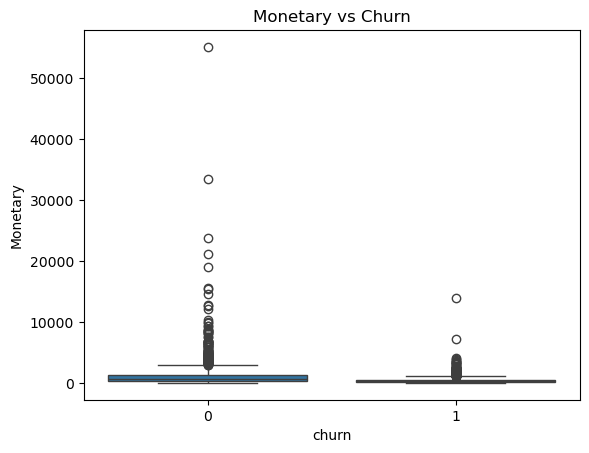

In [11]:
# MONETARY BY CHURN
sns.boxplot(x="churn", y="Monetary", data=df)
plt.title("Monetary vs Churn")
plt.show()


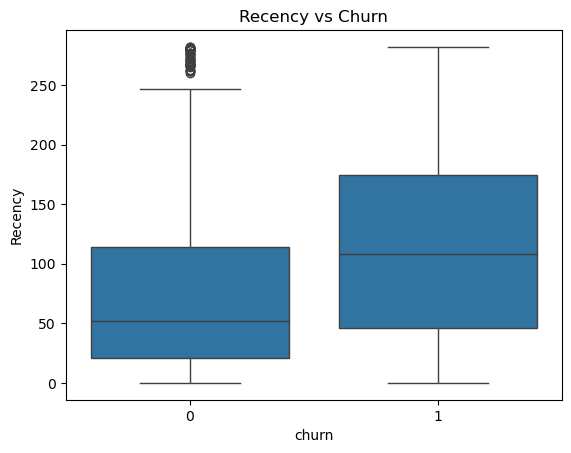

In [12]:
#RECENCY BY CHURN
sns.boxplot(x="churn", y="Recency", data=df)
plt.title("Recency vs Churn")
plt.show()


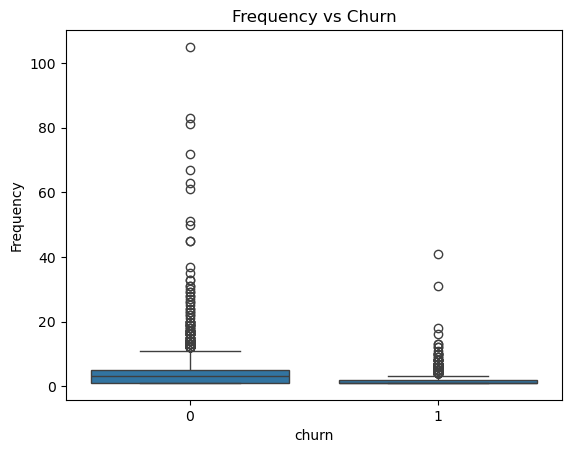

In [13]:
#FREQUENCY BY CHURN
sns.boxplot(x="churn", y="Frequency", data=df)
plt.title("Frequency vs Churn")
plt.show()


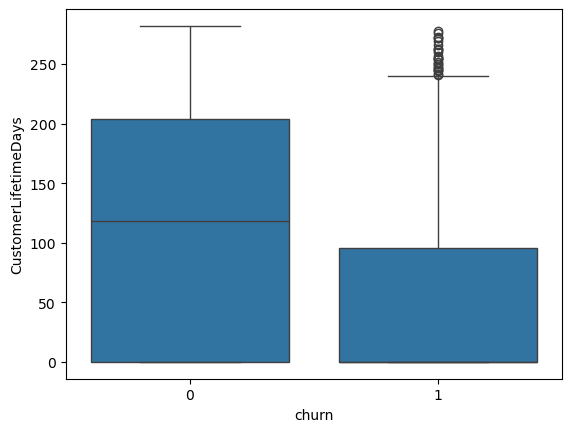

In [14]:
#CUSTOMER LIFE TIME DAYS BY CHURN
sns.boxplot(x="churn", y="CustomerLifetimeDays", data=df)
plt.show()


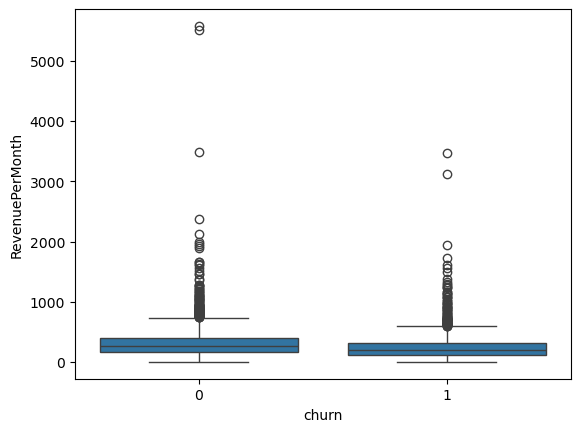

In [15]:
#REVENUE PER MONTH BY CHURN
sns.boxplot(x="churn", y="RevenuePerMonth", data=df)
plt.show()


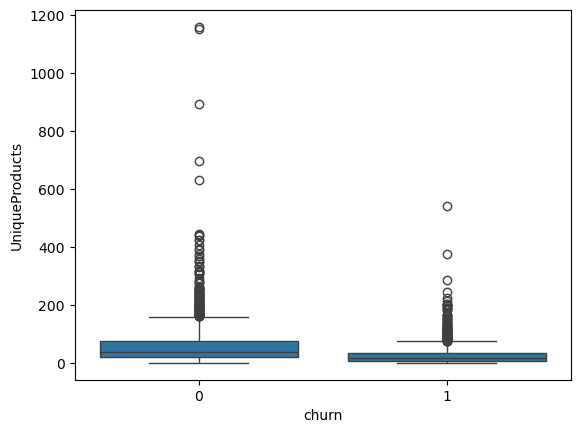

In [16]:
# UNIQUE PRODUCTS BY CHURN
sns.boxplot(x="churn",y="UniqueProducts",data=df)
plt.show()

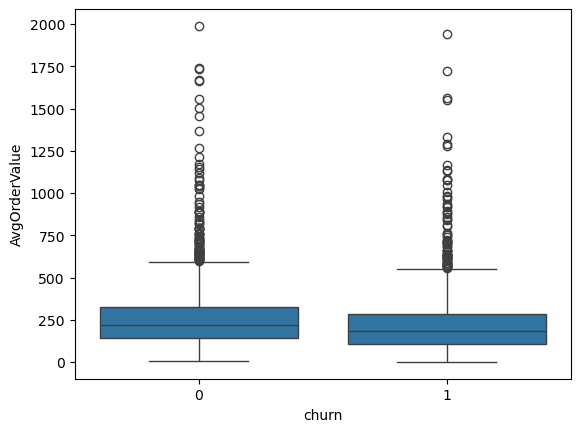

In [17]:
# AVG ORDER VALUE BY CHURN
sns.boxplot(x="churn",y="AvgOrderValue",data=df)
plt.show()

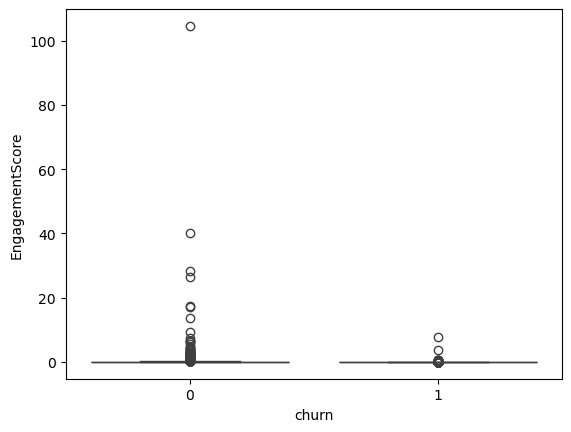

In [18]:
#ENGAGEMENT SCORE BY CHURN
sns.boxplot(x="churn", y="EngagementScore", data=df)
plt.show()


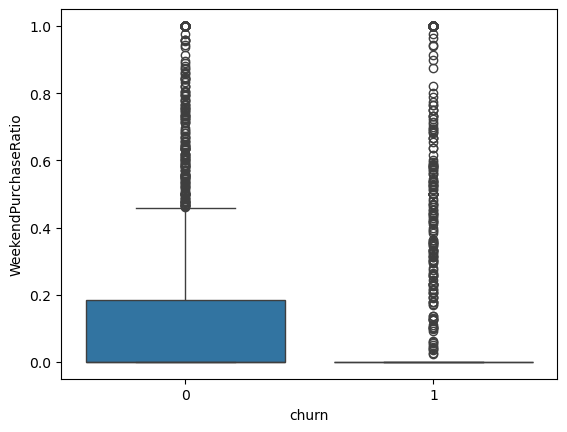

In [19]:
# WEEKENED PURCHASE RATIO
sns.boxplot(x="churn", y="WeekendPurchaseRatio", data=df)
plt.show()


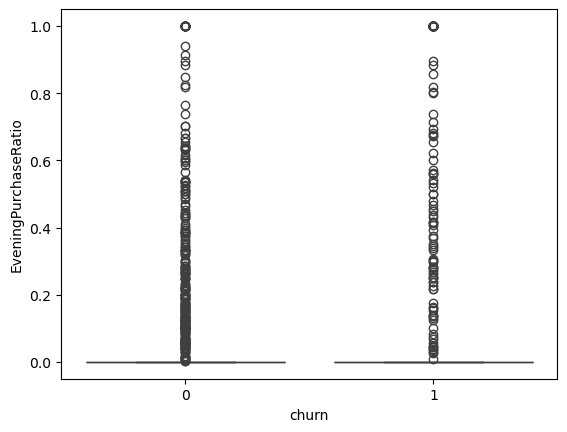

In [20]:
# EVENING PURCHASE RATIO
sns.boxplot(x="churn", y="EveningPurchaseRatio", data=df)
plt.show()

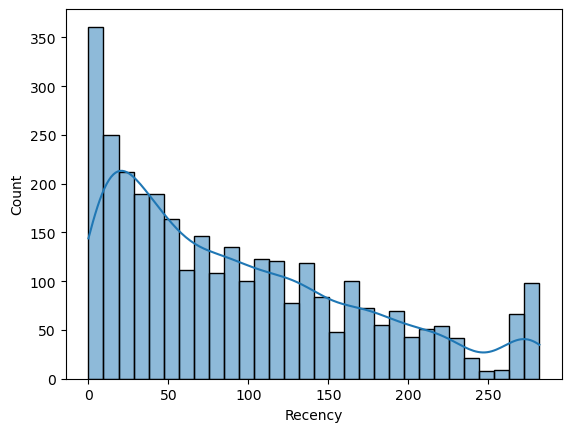

In [21]:
# HISTOGRAM OF RECENCY
sns.histplot(df["Recency"], bins=30, kde=True)
plt.show()

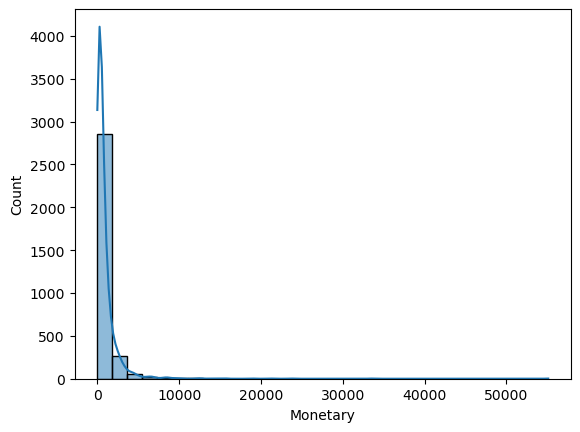

In [22]:
# HISTOGRAM OF MONETARY
sns.histplot(df["Monetary"], bins=30, kde=True)
plt.show()

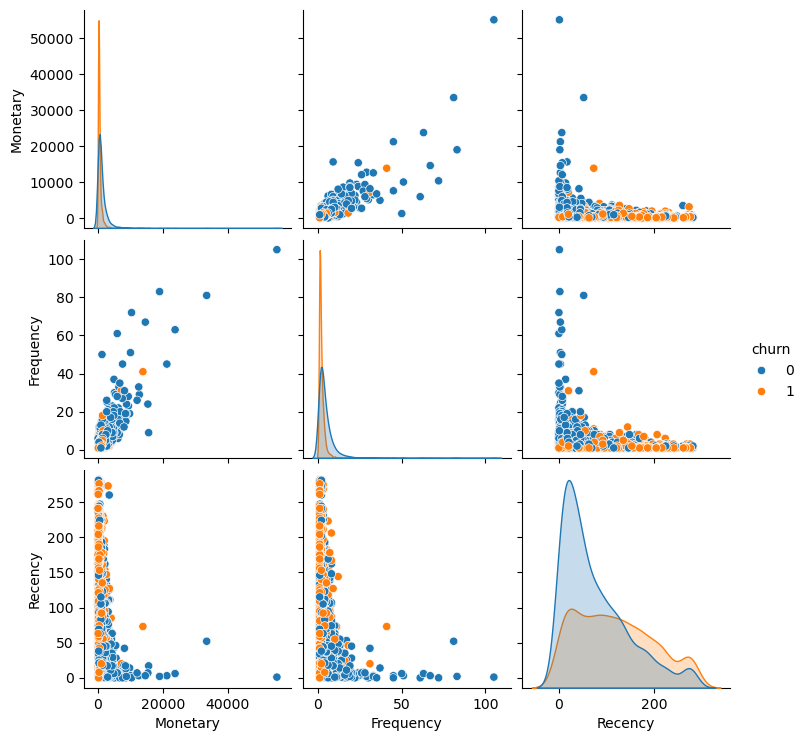

In [23]:
#PAIR PLOT
sns.pairplot(df[["Monetary","Frequency","Recency","churn"]],hue="churn")
plt.show()

# Statistical Hypothesis Testing

In [24]:
from scipy.stats import ttest_ind

In [25]:
#T-test Monetary

active=df[df["churn"]==0]["Monetary"]
churned=df[df["churn"]==1]["Monetary"]

t_stat,p_val=ttest_ind(active,churned)
print("Monetary p-value:",p_val)

Monetary p-value: 2.349782989345589e-32


In [26]:
#T-test Recency
active=df[df["churn"]==0]["Recency"]
churned=df[df["churn"]==1]["Recency"]

t_stat,p_val=ttest_ind(active,churned)
print("Recency p-value:",p_val)

Recency p-value: 2.0493693642581698e-52


In [27]:
#T-test Frequency
active = df[df["churn"] == 0]["Frequency"]
churned = df[df["churn"] == 1]["Frequency"]

t_stat, p_val = ttest_ind(active, churned)

print("Frequency p-value:", p_val)


Frequency p-value: 1.4579269825775615e-41


In [28]:
#T-test Unique Products
active = df[df["churn"] == 0]["UniqueProducts"]
churned = df[df["churn"] == 1]["UniqueProducts"]

t_stat, p_val = ttest_ind(active, churned)

print("UniqueProducts p-value:", p_val)


UniqueProducts p-value: 9.209978980461175e-46


In [29]:
#T-test Customer Lifetime Days
active = df[df["churn"] == 0]["CustomerLifetimeDays"]
churned = df[df["churn"] == 1]["CustomerLifetimeDays"]

t_stat, p_val = ttest_ind(active, churned)

print("CustomerLifetimeDays p-value:", p_val)


CustomerLifetimeDays p-value: 2.527033805925008e-95
